## Problem Statement
This notebook provides the exploratory data analysis(EDA) of the task using pandas library. 
The task is to predict the avocados prices based on the given features.

In [1]:
# import python libraries to perform data analysis and visualization task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# model specific imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#import xgboost as xgb

### 1. Data Import and displaying details

In [2]:
# Load data using pandas and transform them into dataframes
imported_data = pd.read_csv('../price-and-sales-data.csv')
df1 = imported_data.copy()
df1.drop_duplicates() # remove duplicate rows (if any)
print(df1.iloc[0]) # display the first row of the dataframe
print(df1.shape[1]) # display the number of columns in the dataframe
df1.head()

Date              2015-01-04
AveragePrice            1.22
TotalVolume         40873.28
4046                  2819.5
4225                28287.42
4770                    49.9
TotalBags            9716.46
SmallBags            9186.93
LargeBags             529.53
XLargeBags               0.0
type            conventional
year                    2015
region                Albany
Name: 0, dtype: object
13


,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


- The data is avacados prices/volumes from January 2015 until July 2019 from different regions and subregions in USA. There are in total 25161 rows and 13 columns. 

In [3]:
# renaming columns having numeric names
df1 = df1.rename(columns={'4046':'code1', '4225':'code2', '4770':'code3'})

### 2. Data Exploration 

In [4]:
df1.describe(include='all') # this will provide a statistics of all the fields of a dataframe.

,Date,AveragePrice,TotalVolume,code1,code2,code3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
count,25161,24259.000000,2.421200e+04,2.426100e+04,2.425500e+04,2.424500e+04,2.427100e+04,2.422700e+04,2.421400e+04,24293.000000,25161,25161.000000,25161
unique,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12582,NaN,466
mean,NaN,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,NaN,2016.776877,NaN
std,NaN,0.384476,3.731937e+06,1.288583e+06,1.209445e+06,1.046621e+05,1.232967e+06,8.693043e+05,3.586079e+05,25806.499886,NaN,1.323978,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.110000,1.323404e+04,8.225900e+02,3.061135e+03,0.000000e+00,7.319505e+03,4.770445e+03,2.358200e+02,0.000000,NaN,2016.000000,NaN
50%,NaN,1.360000,1.190528e+05,9.855110e+03,2.697755e+04,1.937600e+02,4.625771e+04,3.133734e+04,4.043680e+03,0.000000,NaN,2017.000000,NaN
75%,NaN,1.640000,4.733783e+05,1.141219e+05,1.498719e+05,6.078170e+03,1.394295e+05,1.008827e+05,3.050337e+04,313.890000,NaN,2018.000000,NaN


In [5]:
df1.info() #  Let us display more details columnwise.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          25161 non-null  object 
 1   AveragePrice  24259 non-null  float64
 2   TotalVolume   24212 non-null  float64
 3   code1         24261 non-null  float64
 4   code2         24255 non-null  float64
 5   code3         24245 non-null  float64
 6   TotalBags     24271 non-null  float64
 7   SmallBags     24227 non-null  float64
 8   LargeBags     24214 non-null  float64
 9   XLargeBags    24293 non-null  float64
 10  type          25161 non-null  object 
 11  year          25161 non-null  int64  
 12  region        25161 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.5+ MB


- There are null values that should be removed before performing any prediction tasks. Let's also check the number of null values and visualize them.

In [6]:
null_counts = df1.isnull().sum()
print(null_counts)

Date              0
AveragePrice    902
TotalVolume     949
code1           900
code2           906
code3           916
TotalBags       890
SmallBags       934
LargeBags       947
XLargeBags      868
type              0
year              0
region            0
dtype: int64


<AxesSubplot:ylabel='Date'>

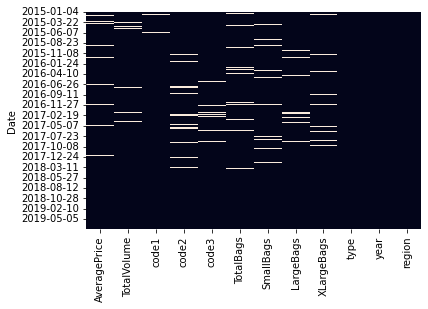

In [7]:
import seaborn as sns
df1_new = df1.set_index('Date')
sns.heatmap(df1_new.isnull(), cbar=False, )

- We can see that except type, year and region all the other features have some null values. We could handle these  null values by imputation techniques. Here I am removing them using pandas dropna().

In [8]:
# remove null values
df1 = df1.dropna()
df1 = df1[df1.region != 'TotalUS']
df1 = df1
df1.shape

(18043, 13)

In [9]:
# Lets us use pivote table to get some more insight of the data.
df1.pivot_table(index='region', values='TotalVolume', margins=True)

,TotalVolume
region,
Albany,5.430986e+04
Atlanta,2.994179e+05
BaltimoreWashington,4.430087e+05
Boise,4.812852e+04
Boston,3.396667e+05
BuffaloRochester,7.711312e+04
California,3.185847e+06
Charlotte,1.247707e+05
Chicago,3.833931e+05


In [10]:
# Extract month from date, so that we can see the monthly avocado sale
df1['Date'] = pd.to_datetime(df1['Date'])
df1['month']  = df1['Date'].dt.month
df1['week']  = df1['Date'].dt.week
df1.head()

/var/folders/j9/gc7gfl4x73j75hd4nbcbdtv40000gn/T/ipykernel_8305/598812747.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['week']  = df1['Date'].dt.week


,Date,AveragePrice,TotalVolume,code1,code2,code3,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,month,week
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,1
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,1
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,1,1
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston,1,1
5,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,conventional,2015,BuffaloRochester,1,1


### 3. Data Visualization

- Let us plot the average price distribution.

/Users/shwetagautam/accenture_datasciencecase/accenture/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Average price distribution of avocados'}, xlabel='AveragePrice', ylabel='Density'>

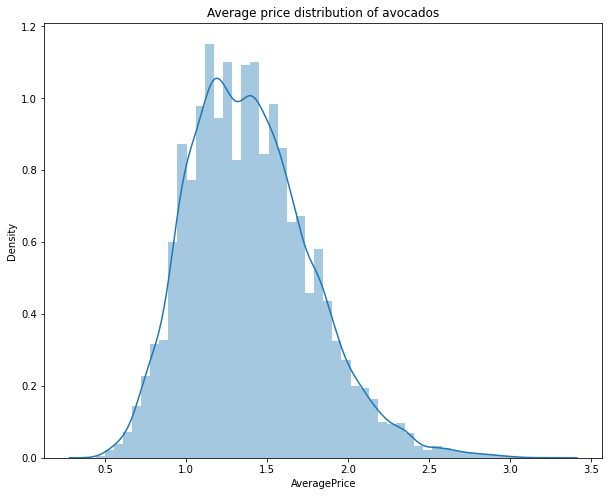

In [11]:
# average Price distribution
plt.figure(figsize = (10,8))
plt.title('Average price distribution of avocados')
sns.distplot(df1['AveragePrice'])

- We can see in the above plot that the average price ranges of avocadoes are approximatelly in between 0.3 and 3.4. The data is more concentrated approximately between prices 0.9 and 1.9. 

- Which type of avocados are in more demand?

- There are two categories of avocados in the data i.e. conventional and organic. Let's visualize the total counts and average prices of each category.

/Users/shwetagautam/accenture_datasciencecase/accenture/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Avocados count on categories'}, xlabel='type', ylabel='count'>

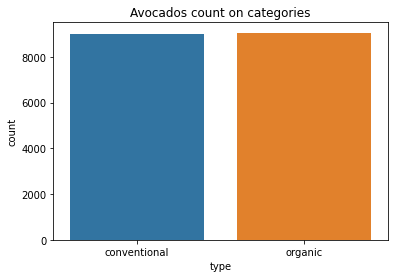

In [12]:
plt.title('Avocados count on categories')
sns.countplot('type', data = df1)

In [13]:
df1['type'].value_counts().reindex(['conventional','organic'], fill_value=0)

conventional    8993
organic         9050
Name: type, dtype: int64

- The plot above shows that both types of avocados are equal in demand. 


<AxesSubplot:title={'center':'Average price range'}, xlabel='type', ylabel='AveragePrice'>

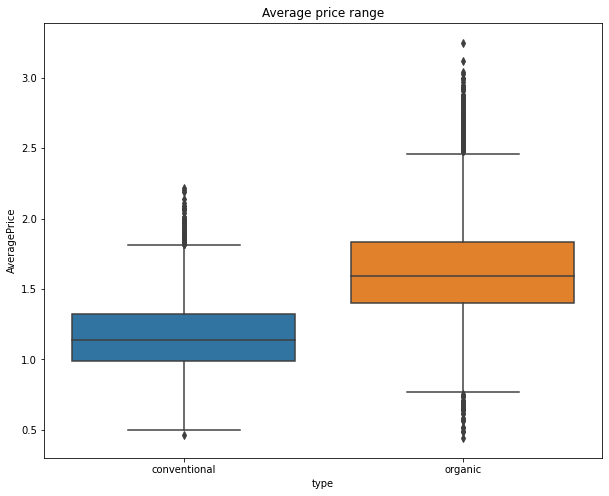

In [14]:
plt.figure(figsize = (10,8))
plt.title('Average price range')
sns.boxplot(x='type', y='AveragePrice', data=df1) # box plot of average prices vs category

- We can see the organic avocados are significatly expensive than the conventional avocados.

##### Let us analyze the average price of both types of avocados over the months and years.

<AxesSubplot:title={'center':'Monthly Averge Price'}, xlabel='month', ylabel='AveragePrice'>

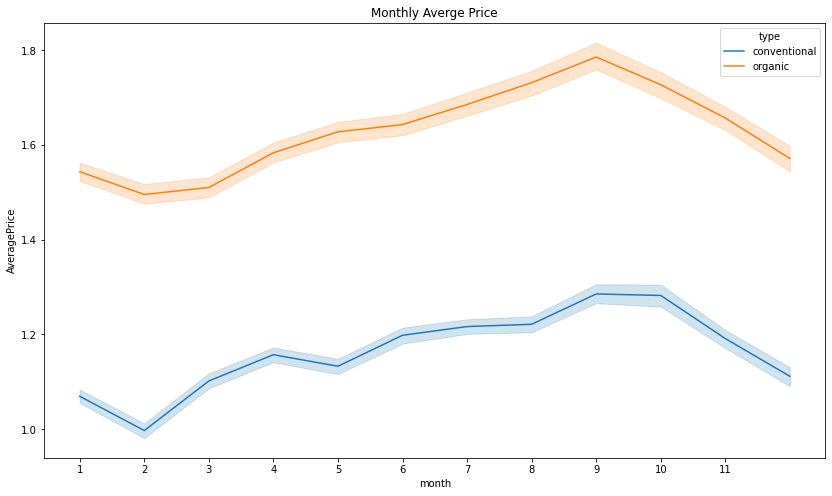

In [15]:
plt.figure(figsize = (14,8))
plt.title('Monthly Averge Price')
plt.xticks([i for i in range(1,12)])
sns.lineplot(x='month', y='AveragePrice', data=df1, hue='type') # line plot of average price vs month

- We can see here that the avocados are most expensive in the months of September and October while cheapest in the month of February.  

<AxesSubplot:title={'center':'Yearly Averge Price'}, xlabel='year', ylabel='AveragePrice'>

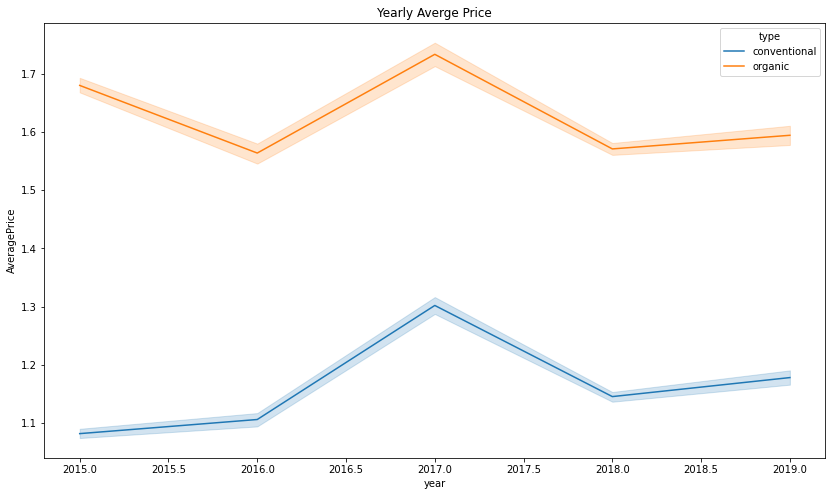

In [16]:
plt.figure(figsize = (14,8))
plt.title('Yearly Averge Price')
sns.lineplot(x='year', y='AveragePrice', data=df1, hue='type') # line plot of average price vs year

- From the above plot one can see that the year 2017 was the most expensive for the avocados.

##### Let us find out the regions where avocados are the most expensive and least expensive.


- We plot the average price against regions using box plot

<AxesSubplot:title={'center':'Average price range in area'}, xlabel='region', ylabel='AveragePrice'>

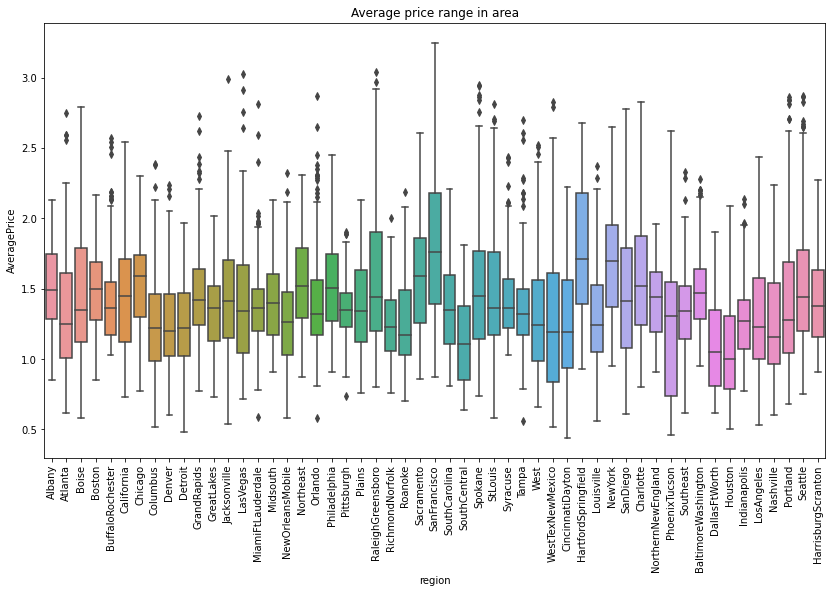

In [17]:
plt.figure(figsize = (14,8))
plt.title('Average price range in area')
plt.xticks(rotation = 'vertical')
sns.boxplot(x='region', y='AveragePrice', data=df1)

- From the above plot, we can see that the avocados are most expensive in San Francisco and HartforSpringField regions. The prices are relatively low in SouthCentral, DallasFtWorth and Houston is the cheapest.

#### Let us check the Top 5 regions where Average consumption (volume) is  high

Text(0.5, 1.0, 'Average of Total Volume According to Region')

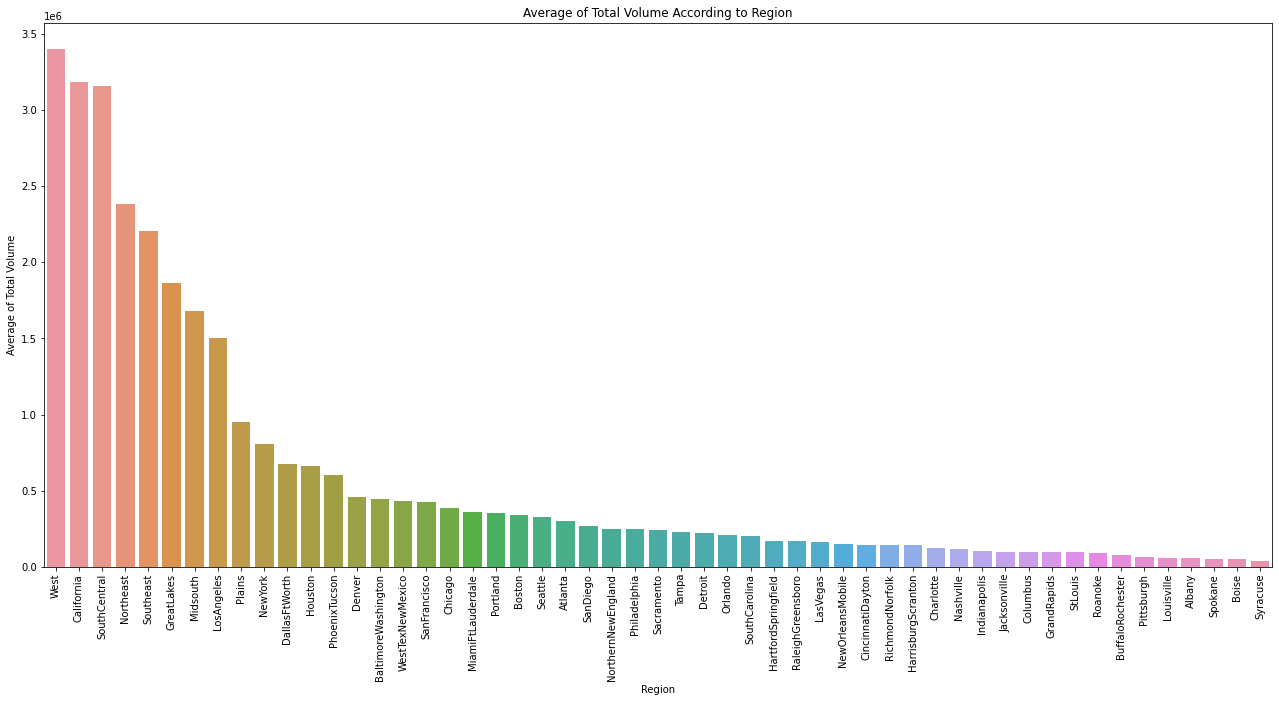

In [18]:
df2=df1
region_list=list(df2.region.unique())
average_total_volume=[]

for i in region_list:
    #print(i)
    x=df2[df2.region==i]
    #print(len(x))
    average_total_volume.append(sum(x['TotalVolume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- The consumption is very high in West, California, SouthCentral, Northeast and Southeast region.

#####  Let us check how the avacado prices are distributed over the time?

Text(0, 0.5, 'Average Price')

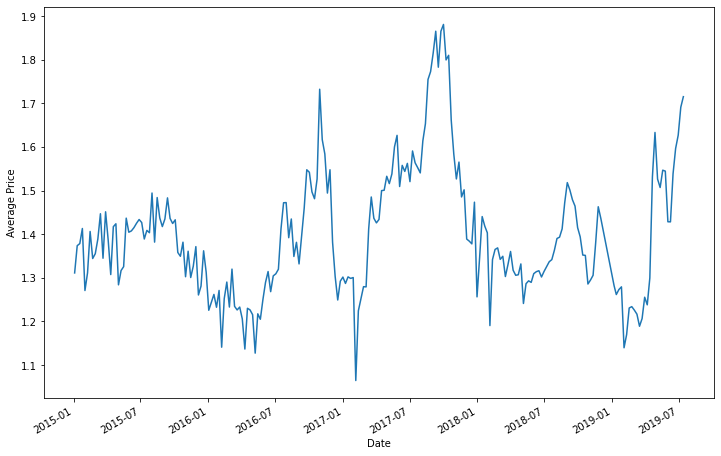

In [19]:
time_series=df1.groupby('Date').mean()
plt.figure(figsize=(12,8))
time_series['AveragePrice'].plot()
plt.ylabel('Average Price')
#plt.title('Average Price')

- One can see that the yearly prices show some seasonal trend here. For example, in the month of February the prices are lowest and in the months of Sep-October the prices are high. There is a noticeable price peak in the year 2017.  

#####  Let us find out the correlation between data features

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

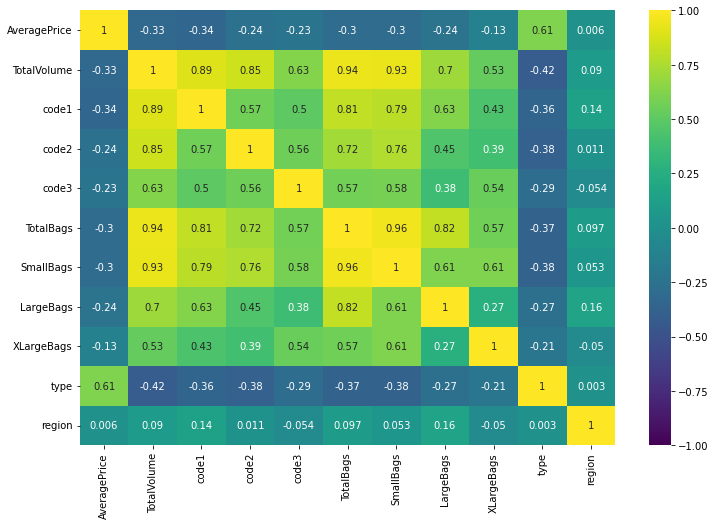

In [53]:
#sns.pairplot(df1)
df1_corr = df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df1_corr,vmin=-1, vmax=1, cmap='viridis', annot=True) # plotting heatmap of features
plt.plot

- From the heatmap we can see that the features are not correlated with the AveragePrice, but most of them are mutually highly correlated. The low correlations themselves do not mean anything. You have to keep in mind correlation is a measure of linear association, so you get low values for strongly nonlinear association which can be captured by learning algorithms. Besides that, we are using all independent variables at once in our model, so we can still have a better performance than using any of them separately. It does not seem that droping the features will benefit, so I am selecting all of them for the prediction of average price. We will see sooner how it works.


### 4. Predicting avocados prices using machine learning methods

- Before model building we perform the following feature engineering steps. (1) time feature is irrelevant, so we drop it (2) there are two sets of categorical features, namely 'type' and 'region'. I use one-hot encoding to convert 'type' feature into numeric values. To encode 'region' feature into numeric values I use Scikitlearn's OrdinalEncoder.   

In [21]:
# Drop time columns which are not required for model training
df1 = df1.drop(['Date', 'month', 'week','year'], axis=1)
df1.head()

,AveragePrice,TotalVolume,code1,code2,code3,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,Boise
4,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,Boston
5,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,conventional,BuffaloRochester


In [22]:
# Transform categorical data into numeric data by one-hot encoding using pandas dummies function
df1['type'] = pd.get_dummies(df1['type'], drop_first = True)
df1.head()

,AveragePrice,TotalVolume,code1,code2,code3,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,Albany
1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,Atlanta
3,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,Boise
4,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,Boston
5,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,0,BuffaloRochester


In [23]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit([df1['region']])
df1['region']= encoder.fit_transform(df1[['region']])
#df1.head()

In [24]:
df_y = df1['AveragePrice'] # target variable
df_x = df1.drop('AveragePrice', axis=1) # feature set

In [25]:
X = df_x.values # list of feature values
y= df_y.values  # list of target values

#### Model selection and prediction

- We are ready with our data to build prediction model. For building average price prediction model I used the  following machine learning methods  1) Linear regression, 2) Random Forest Regressor and 3) Extra Tree Regressor. 

- Splitting data into test and training sets. I choose the commonly used test-train split of 67% and 33%. There can be other choices as well to select the split but since there is no computational constraints that favor such choices in this case.    

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [27]:
# A function to calculate different evaluation metrics: MAE, MSE, RMSE, r2_score
from sklearn import metrics
def evaluate(predictions, test_features, test_labels):
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('r2 score =', r2_score(y_test, predictions))
    
    return accuracy

- LINEAR REGRESSION 
Since our data include continous and categorical variables we start with Linear Regression

In [28]:
# Training the model using linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# generate predictions on test set
ypred = lr.predict(X_test) 

In [29]:
# Evaluate the model performance
evaluate(ypred, X_test, y_test)

Model Performance
Accuracy = 82.87%.
MAE: 0.22547368265885934
MSE: 0.08562064394731667
RMSE: 0.2926100544193871
r2 score = 0.3966873052585429


82.87407597854315

- The RMSE value of linear regression model is low and the model accuracy is good. Let us visualize the predicted values vs actual values.

,Y Test,Pred
0,0.80,1.177659
1,1.58,1.636955
2,1.48,1.621418
3,1.22,1.179841
4,1.21,1.187268


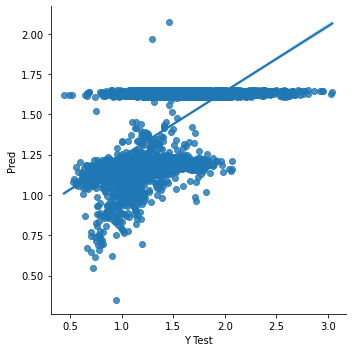

In [30]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':ypred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

- RANDOM FOREST REGRESSION

Random forest regression is used to solve a variety of problems where one needs to predict a continuous value. It is one of the most popular algorithm due to its simplicity and high accuracy.

In [31]:
# Training the model using random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Generate predictions on test set
ypred = rf.predict(X_test)

In [32]:
# Evaluate model performance
evaluate(ypred, X_test, y_test)

Model Performance
Accuracy = 90.80%.
MAE: 0.12438905121746432
MSE: 0.031338295922753986
RMSE: 0.17702625772114708
r2 score = 0.7791795192127323


90.80303698276234

,Y Test,Pred
0,0.80,1.1024
1,1.58,1.5978
2,1.48,1.5034
3,1.22,1.2213
4,1.21,1.2249


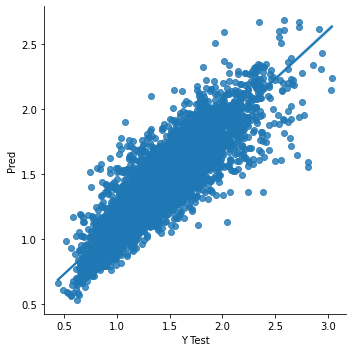

In [33]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':ypred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

- EXTRA TREE REGRESSION:
Extra trees are very similar to Random Forest. This also gives high accuracy in predicting continuous values. The difference between them is the selection of cut points in order to split nodes. Random Forest chooses the optimum split while Extra Trees chooses it randomly.

In [34]:
# Training the model using extra trees
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
# Generate predictions on test set
ypred = et.predict(X_test)

In [35]:
# Evaluate model performance
evaluate(ypred, X_test, y_test)

Model Performance
Accuracy = 91.69%.
MAE: 0.1130101259445844
MSE: 0.026643974460117553
RMSE: 0.16322982098905076
r2 score = 0.8122573331725116


91.690925965558

,Y Test,Pred
0,0.80,0.9945
1,1.58,1.6015
2,1.48,1.4873
3,1.22,1.2220
4,1.21,1.2188


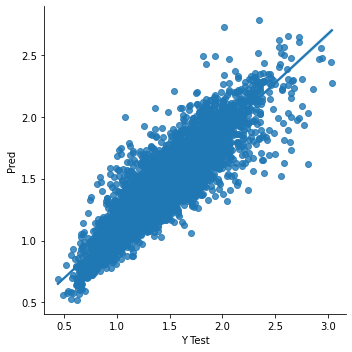

In [36]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':ypred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

- Performance Summary:

- Linear Regression: The RMSE value of linear regression model is low and the model accuracy is good. But from the plot we can clearly observe that we do not get the straight line between target values and predicted values. So I am not sure that this is the best model we can apply on this data.

- Random Forest: The evaluation measures are shows the good performance of the model, and we nearly have a straight line between target and predicted values. Therefore, we can say Random Forest perform better than Linear Regression

- Extra Trees: The evaluation measures are shows the model perform better than Linear Regression and Random Forest.

- Therfore, the winner is Extra Tree Regressor.

- However, I trained all the models on default parameters. The model could perform better with optimized hyperparameters. One can optimize the hyperparameters by using cross validation method and grid search.

### 5. Time Series Analysis and Forecasting of price/volume

- One of the interesting insights gained from the above EDA exercise relates to the average price fluctuations and correlation between average price and total volume. It should be noted that the average price shows a seasonality: it goes down during February to April and goes up in between September-October. However, in the year 2017, there was huge spike in the average prices.  The correllation factor between the average price and the total volume is -0.33. This relates to the seasonal fluctuations in the average prices: the price goes up then the the total avocado consumption goes down, and vice versa.

- In the following I try to analyze the price and volume data using time series analysis. I apply one of the most popular time-series forecasting library FacebookProphet to forecast both price and volume. Further, I used the given Google search data to check if this can help in explaining price fluctuations in price. For example the price fluctuations of 2017 and also if there was a rise in price over the years.     

In [37]:
from prophet import Prophet # import the facebookprophet library

Importing plotly failed. Interactive plots will not work.


In [38]:
df_ts = imported_data.loc[:, ["Date","TotalVolume"]]
df_ts['Date'] = pd.DatetimeIndex(df_ts['Date'])
df_ts = df_ts.dropna()
df_ts.shape

(24212, 2)

In [39]:
df_ts.head()

,Date,TotalVolume
0,2015-01-04,40873.28
1,2015-01-04,435021.49
2,2015-01-04,788025.06
3,2015-01-04,80034.32
4,2015-01-04,491738.00


In [40]:
df_ts.isna().sum()

Date           0
TotalVolume    0
dtype: int64

In [41]:
df_ts = df_ts.rename(columns={'Date': 'ds',
                        'TotalVolume': 'y'})

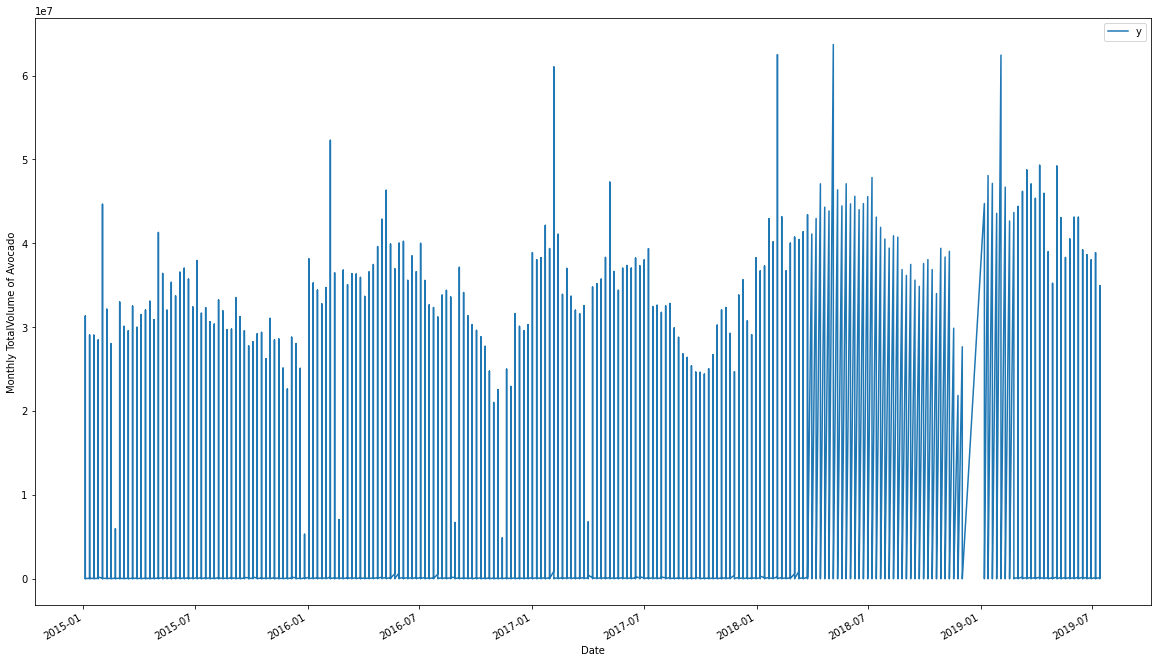

In [42]:
ax = df_ts.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Monthly TotalVolume of Avocado')
ax.set_xlabel('Date')

plt.show()

#### Note: There is an abrupt change in volume in the month of dec 2018. Four weeks of data is missing.  

In [43]:
my_model = Prophet(daily_seasonality=True)
my_model.fit(df_ts)

future = my_model.make_future_dataframe(periods=500)
forecast =my_model.predict(future)

Initial log joint probability = -45.9098
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       56617.1   0.000160584       289.652           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       56617.2   3.26112e-06       108.294   2.243e-08       0.001      301  LS failed, Hessian reset 
     199       56617.2   1.27529e-05        67.737      0.3162      0.3162      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       56617.2   1.20894e-06       66.3563        0.32        0.32      371   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


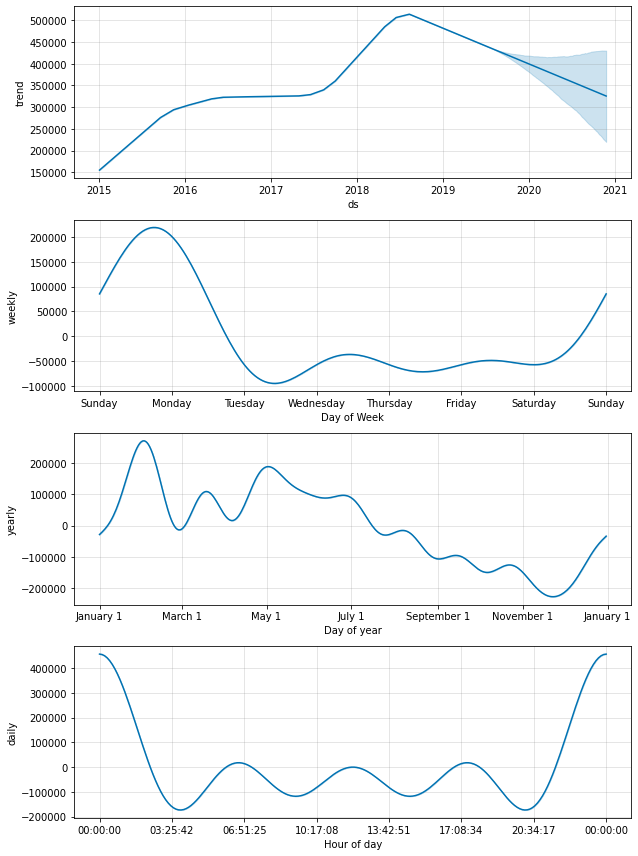

In [44]:
fig2 = my_model.plot_components(forecast)

In [45]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2019-07-14") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2019-07-14")
forecastnew = forecastnew.loc[mask]

Red = Predicted Values, Blue = Base Values


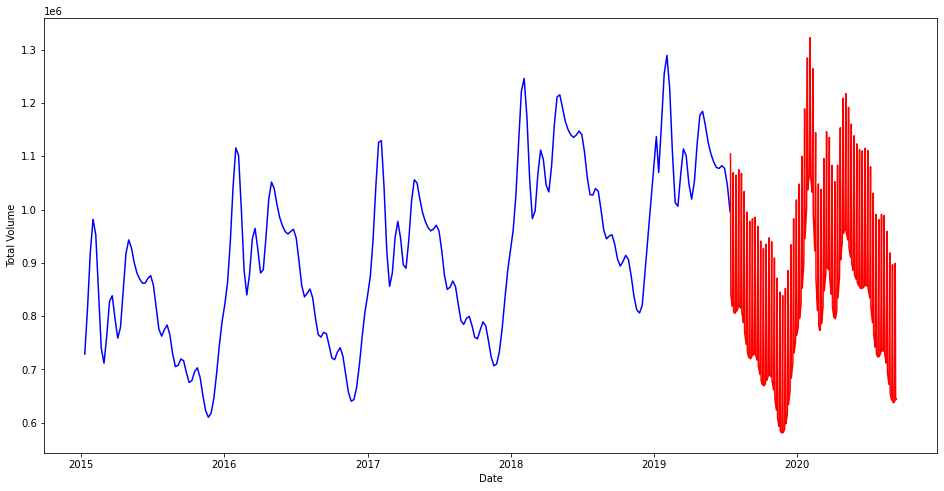

In [46]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Total Volume')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

- The above plot shows a forecast of total volume. The forecast follows the sesonal trend of the total volume and also shows that the total volume will go down and then will be up in the comming year.

#### - Analysis of Google search data

In [54]:
df_google = pd.read_csv('../google-data.csv')
df_google = df_google.rename(columns={'Week':'Date'})
df_google.head()

,Date,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42


Text(0.5, 1.0, 'Google searches')

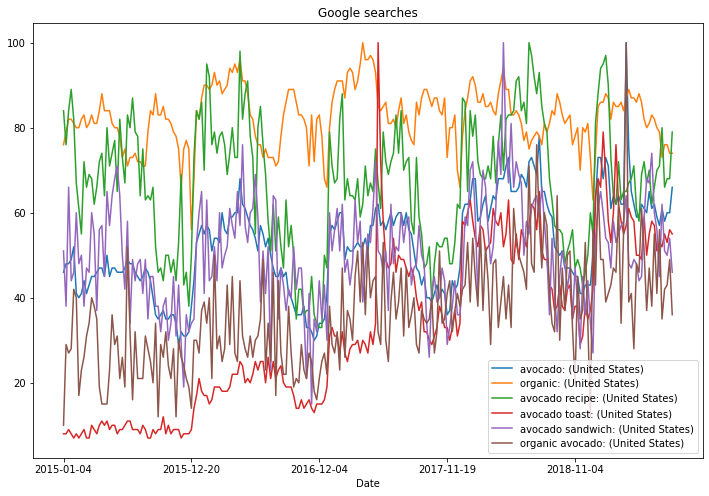

In [55]:
# plotting the Google search data 
time_series=df_google.groupby('Date').mean()
time_series.plot(figsize=(12,8))
plt.title('Google searches')

- Some of the insights drawn from the above plot of Google search data are as follows. Google search of toast and organic avocado keywords shows a significant rise over the years. The organic products have lately been more on demand. Maybe toast also became more popular in recent years! The other keywords data shows a yearly seasonal fluctuations.   

In [49]:
normalize_df = df_google.copy()
normalize_df = normalize_df.drop('Week', axis=1)
normalize_df=(normalize_df)/10 # Scaling the google search values only for plotting
normalize_df['Date'] = df_google['Week']
normalize_df.head()

,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States),Date
0,4.6,7.6,8.4,0.8,5.1,1.0,2015-01-04
1,4.8,7.9,7.6,0.8,3.8,2.9,2015-01-11
2,4.8,8.2,8.4,0.9,6.6,2.7,2015-01-18
3,4.9,8.2,8.9,0.8,4.4,2.8,2015-01-25
4,5.2,8.1,8.2,0.7,4.6,4.2,2015-02-01


Text(0.5, 1.0, 'Google searches for keyword "avocado toast" and AveragePrice')

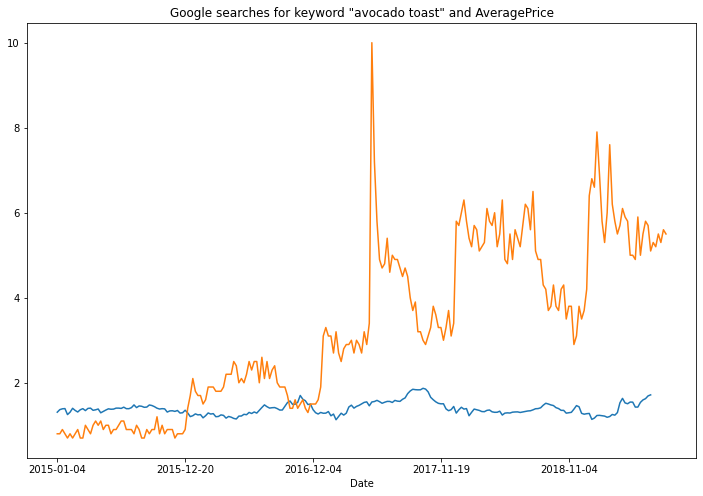

In [56]:
# Plotting the average price and 
time_series=imported_data.groupby('Date').mean()
time_series['AveragePrice'].plot(figsize=(12,8))
#plt.ylabel('Average Price')

time_series=normalize_df.groupby('Date').mean()
time_series['avocado toast: (United States)'].plot(figsize=(12,8))
plt.title('Google searches for keyword "avocado toast" and AveragePrice')

- In the above plot average price is potted underneath the Google search data of avocado toast. I wanted to check whether the search data explains the average price fluctuations. It does not seem to do so.   